# Цель лабораторной работы

Изучение ансамблей моделей машинного обучения

# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

# Ход выполнения лабораторной работы

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

sns.set(style="ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

pd.set_option("display.width", 70)

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Набор данных не содержит пропусков

In [7]:
data['target'].unique()

array([1, 0], dtype=int64)

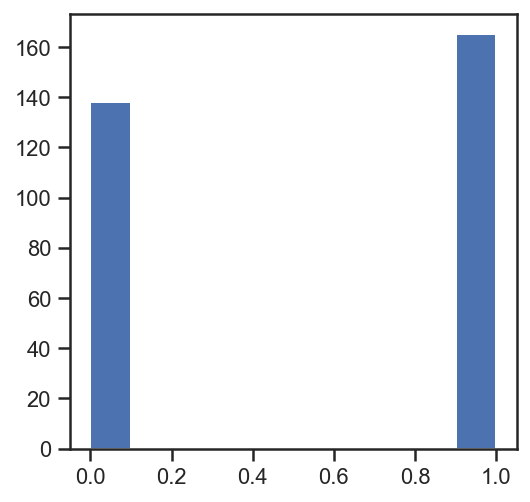

In [8]:
fig, ax = plt.subplots(figsize=(4,4)) 
plt.hist(data['target'])
plt.show()

In [9]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
total = data.shape[0]
class_1, class_0 = data['target'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 2)*100, round(class_1 / total, 2)*100))

Класс 0 составляет 46.0%, а класс 1 составляет 54.0%.


Дисбаланса классов практически нет

#### Проведем масштабирование данных 

In [11]:
scale_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [12]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [13]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,trestbps_scaled,chol_scaled,fbs_scaled,restecg_scaled,thalach_scaled,exang_scaled,oldpeak_scaled,slope_scaled,ca_scaled,thal_scaled
0,63,1,3,145,233,1,0,150,0,2.3,...,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,37,1,2,130,250,0,1,187,0,3.5,...,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,41,0,1,130,204,0,0,172,0,1.4,...,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,56,1,1,120,236,0,1,178,0,0.8,...,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,57,0,0,120,354,0,1,163,1,0.6,...,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [15]:
corr_cols_1 = scale_cols + ['target']
corr_cols_1

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [16]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['target']
corr_cols_2

['age_scaled',
 'sex_scaled',
 'cp_scaled',
 'trestbps_scaled',
 'chol_scaled',
 'fbs_scaled',
 'restecg_scaled',
 'thalach_scaled',
 'exang_scaled',
 'oldpeak_scaled',
 'slope_scaled',
 'ca_scaled',
 'thal_scaled',
 'target']

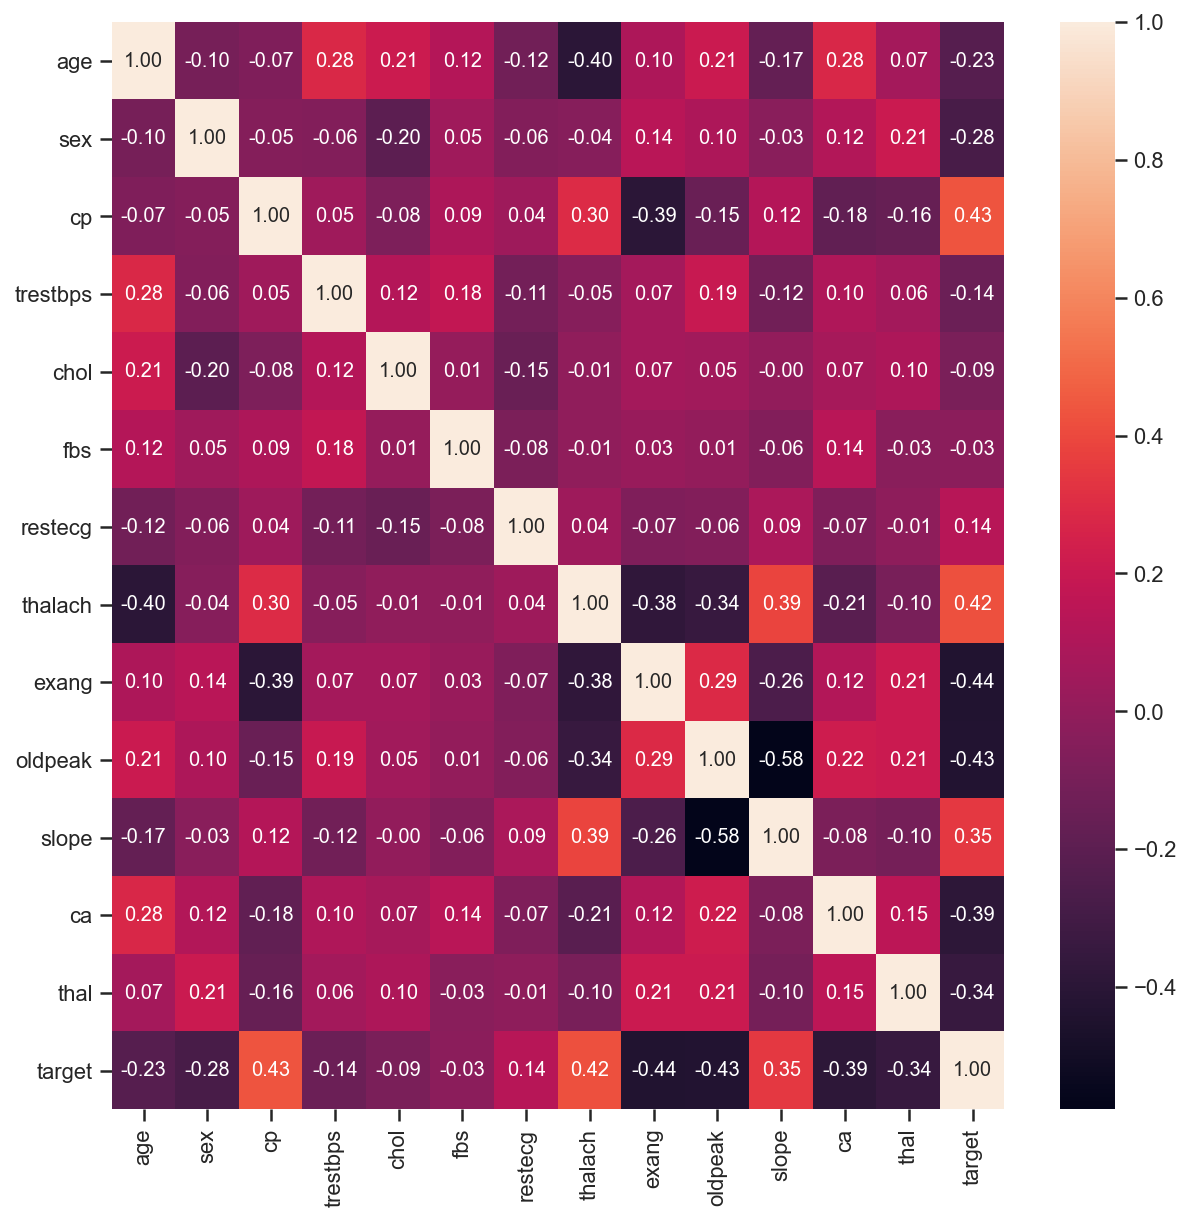

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

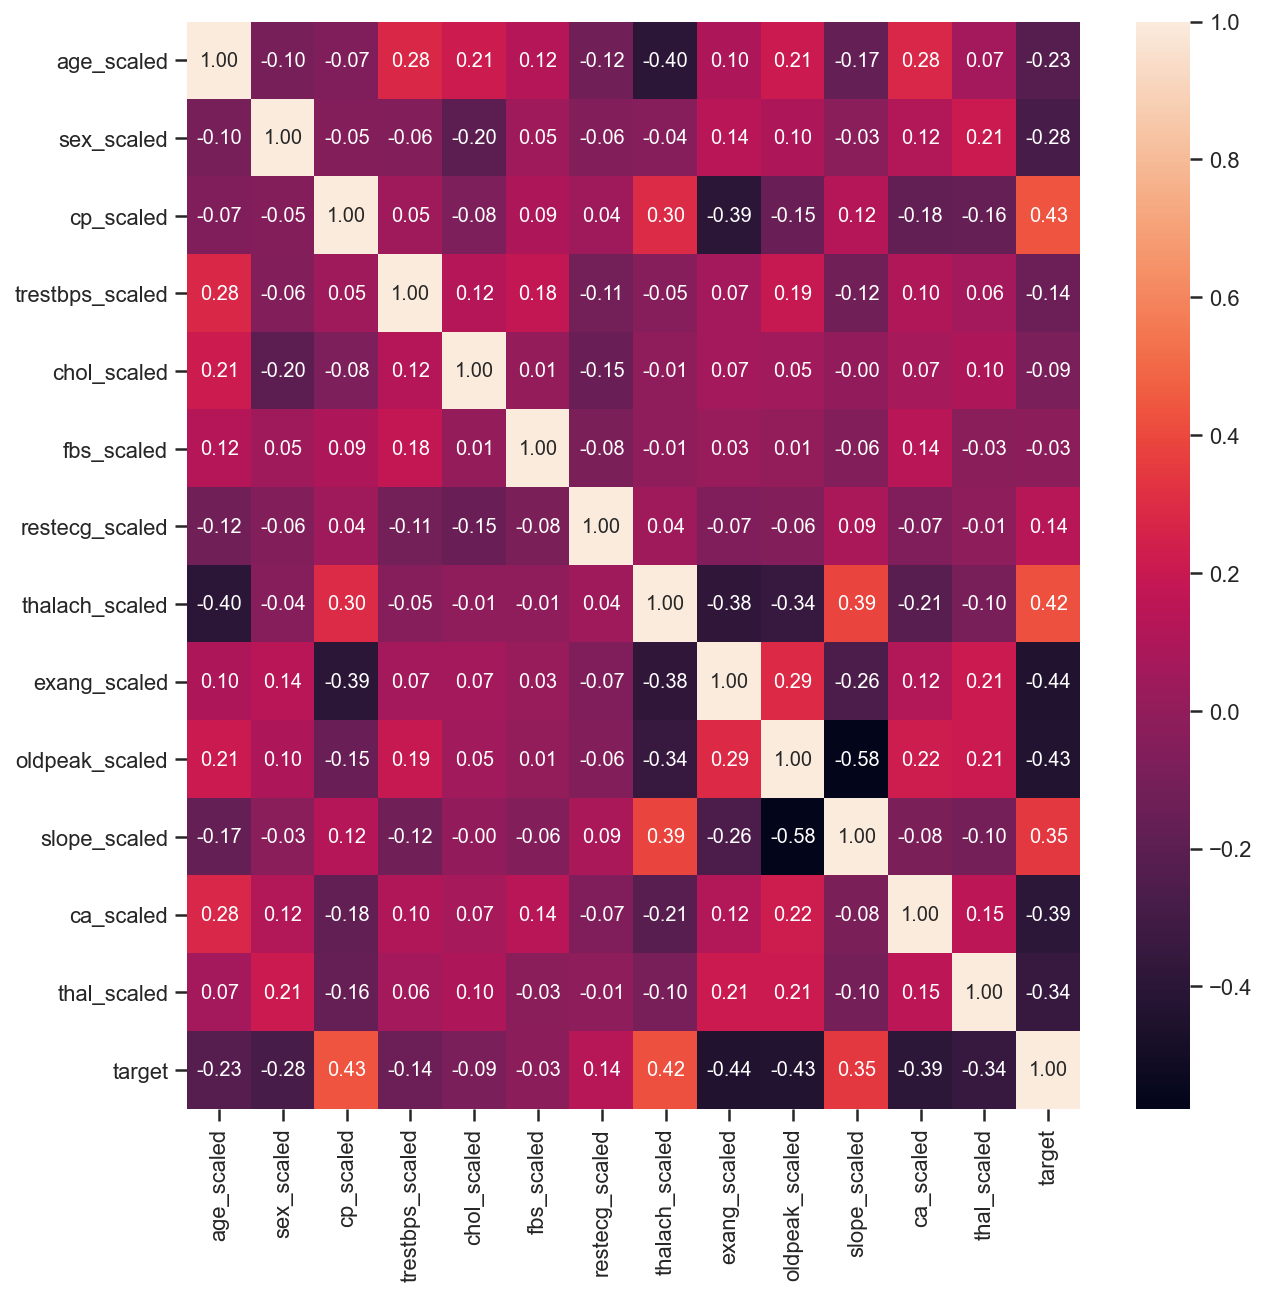

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают;
* Колонку trestbps, fbs, chol можно не включать, так как имеют очень слабую корреляцию с целевым признаком.

In [19]:
class_cols = ['age_scaled', 'sex_scaled', 'cp_scaled', 'restecg_scaled', 'thalach_scaled', 'exang_scaled',
                  'oldpeak_scaled', 'slope_scaled', 'ca_scaled', 'thal_scaled']

In [20]:
X = data[class_cols]
y = data['target']
print(X, "\n")
print(y)

     age_scaled  sex_scaled  cp_scaled  restecg_scaled  \
0      0.708333         1.0   1.000000             0.0   
1      0.166667         1.0   0.666667             0.5   
2      0.250000         0.0   0.333333             0.0   
3      0.562500         1.0   0.333333             0.5   
4      0.583333         0.0   0.000000             0.5   
..          ...         ...        ...             ...   
298    0.583333         0.0   0.000000             0.5   
299    0.333333         1.0   1.000000             0.5   
300    0.812500         1.0   0.000000             0.5   
301    0.583333         1.0   0.000000             0.5   
302    0.583333         0.0   0.333333             0.0   

     thalach_scaled  exang_scaled  oldpeak_scaled  slope_scaled  \
0          0.603053           0.0        0.370968           0.0   
1          0.885496           0.0        0.564516           0.0   
2          0.770992           0.0        0.225806           1.0   
3          0.816794           0.0  

#### Разделим выборку на обучающую и тестовую

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (227, 10)
X_test: (76, 10)
y_train: (227,)
y_test: (76,)


In [22]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [23]:
metricLogger = MetricLogger()

In [24]:
def test_model(model_name, model, metricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metricLogger.add('precision', model_name, precision)
    metricLogger.add('recall', model_name, recall)
    metricLogger.add('f1', model_name, f1)
    metricLogger.add('accuracy', model_name, accuracy)
    
    print('*****************************************************')
    print(model)
    print(model_name)
    print("accuracy:", accuracy)
    print("f1_score:", f1)
    print("precision_score:", precision)
    print("recall:", recall)
    print('*****************************************************')

#### Обучим модели

Будем использовать модели: случайный лес, градиентный бустинг

In [25]:
test_model('Random forest', RandomForestClassifier(), metricLogger)
test_model('GB', GradientBoostingClassifier(), metricLogger)

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Random forest
accuracy: 0.8026315789473685
f1_score: 0.8275862068965518
precision_score: 0.782608695652174
recall: 0.8780487804878049
*****************************************************
*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
  

In [26]:
metrics = metricLogger.df['metric'].unique()
metrics

array(['precision', 'recall', 'f1', 'accuracy'], dtype=object)

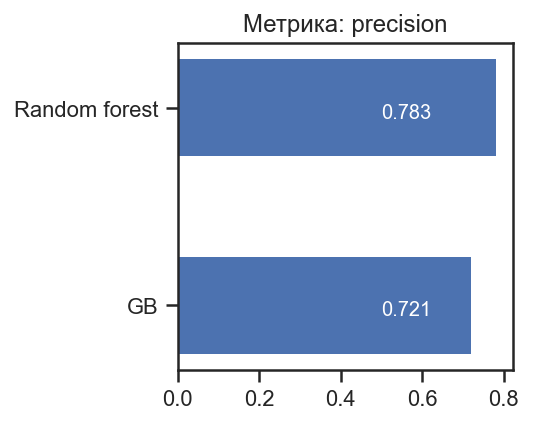

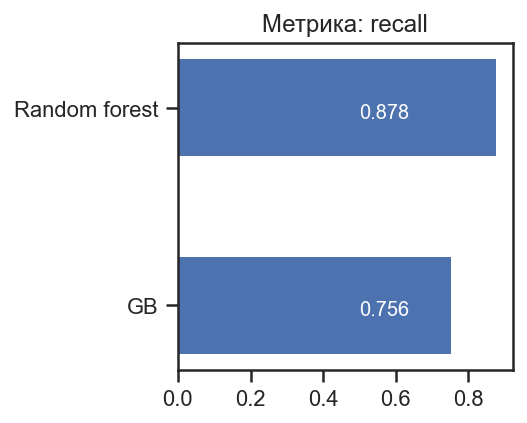

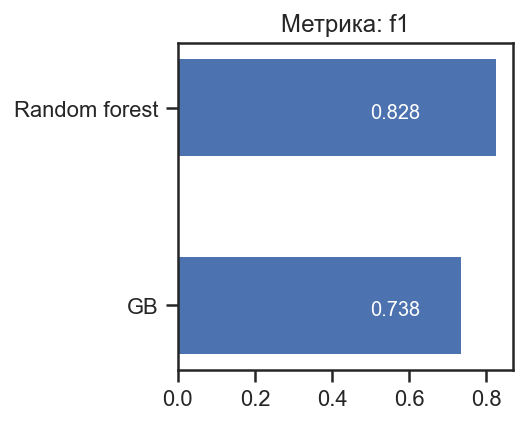

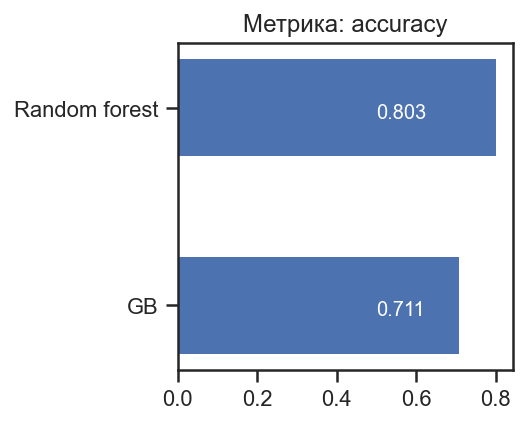

In [27]:
for metric in metrics:
    metricLogger.plot('Метрика: ' + metric, metric, figsize=(3, 3))

#### Вывод: на основании четырех метрик из четырех используемых, лучшей оказалась модель "случайный лес".